In [224]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm

env = "Walker2d"
horizon = 8
data_path = f'/home/amax/xyc/D4MORL/data_generation/data_collected/MO-{env}-v2/MO-{env}-v2_50000_newexpert_uniform.pkl'
trajs = []
with open(data_path, 'rb') as f:
    trajs = pickle.load(f)
    
import numpy as np
idx = np.random.randint(0, 50000, 10000)

obs, act, pref = [], [] ,[]

for i in idx:
    obs.append(trajs[i]['observations'])
    act.append(trajs[i]['actions'])
    pref.append(trajs[i]['preference'])
    
traj_max_len = np.max([len(s) for s in obs])
for items in [obs, act, pref]:
    for i, s in enumerate(items):
        if len(s) < traj_max_len:
            items[i] = np.pad(s, ((0, traj_max_len - len(s)), (0, 0)), mode='constant')
obs, act, pref = np.array(obs), np.array(act), np.array(pref)

obs_slice, act_slice, pref_slice = [], [], []

idx = np.random.randint(0, 500 - horizon, 100)

for i in idx:
    obs_slice.extend(obs[:, i:i+horizon])
    act_slice.extend(act[:, i:i+horizon])
    pref_slice.extend(pref[:, i:i+horizon])
    
obs_slice = np.array(obs_slice)
act_slice = np.array(act_slice)
pref_slice = np.array(pref_slice)

obs_slice.shape, act_slice.shape, pref_slice.shape

((1000000, 8, 17), (1000000, 8, 6), (1000000, 8, 2))

In [225]:
as_traj = np.concatenate([obs_slice], axis=-1)
pref_traj = pref_slice[:, 0, 0]

In [226]:
traj_disc = []
pref_disc = []
gran = 1000
for i in range(gran):
    p1, p2 = i/gran, (i+1)/gran
    filter = (pref_traj < p2) * (pref_traj >= p1)
    if filter.any():
        avg_traj = np.mean(as_traj[filter], axis=0)
        traj_disc.append(avg_traj)
        avg_pref = np.mean(pref_traj[filter], axis=0)
        pref_disc.append(avg_pref)
traj_disc = np.array(traj_disc).reshape(len(traj_disc), -1)
pref_disc = np.array(pref_disc)

In [227]:
traj_disc.shape, pref_disc.shape

((576, 136), (576,))

/home/amax/Software/anaconda3/envs/xyc_morl/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 11 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/amax/Software/anaconda3/envs/xyc_morl/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/amax/Software/anaconda3/envs/xyc_morl/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/amax/Software/anaconda3/envs/xyc_morl/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_ma

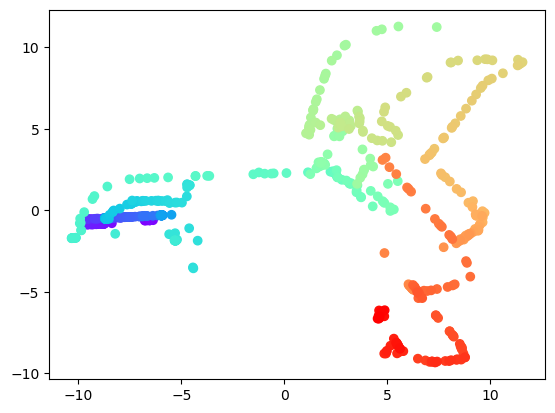

In [228]:
from sklearn.manifold import Isomap
emb = Isomap(n_components=2)
traj_transformed = emb.fit_transform(traj_disc)
n_draw = len(traj_disc)
colors = cm.rainbow(np.linspace(0, 1, n_draw))
plt.scatter(traj_transformed[:n_draw, 0], traj_transformed[:n_draw, 1], color=colors)

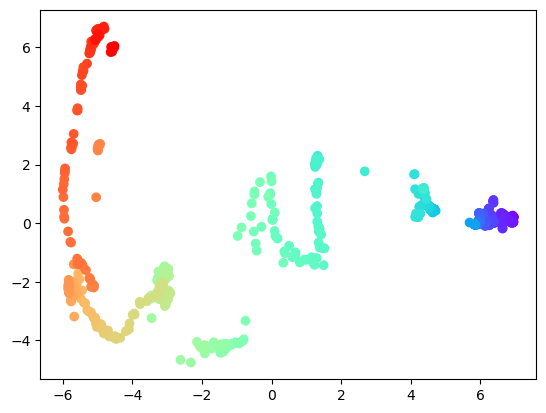

In [229]:
from sklearn.decomposition import PCA
emb = PCA(n_components=2)
traj_transformed = emb.fit_transform(traj_disc)
n_draw = len(traj_disc)
colors = cm.rainbow(np.linspace(0, 1, n_draw))
plt.scatter(traj_transformed[:n_draw, 0], traj_transformed[:n_draw, 1], color=colors)

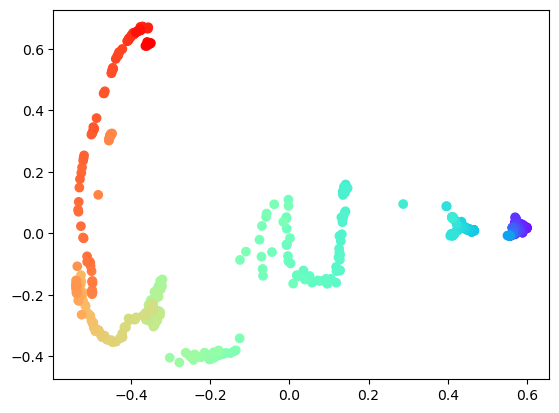

In [230]:
from sklearn.decomposition import KernelPCA
emb = KernelPCA(n_components=2, kernel='rbf') # 'linear', 'poly', 'rbf', 'sigmoid', 'cosine'
traj_transformed = emb.fit_transform(traj_disc)
n_draw = len(traj_disc)
colors = cm.rainbow(np.linspace(0, 1, n_draw))
plt.scatter(traj_transformed[:n_draw, 0], traj_transformed[:n_draw, 1], color=colors)

/home/amax/Software/anaconda3/envs/xyc_morl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/amax/Software/anaconda3/envs/xyc_morl/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


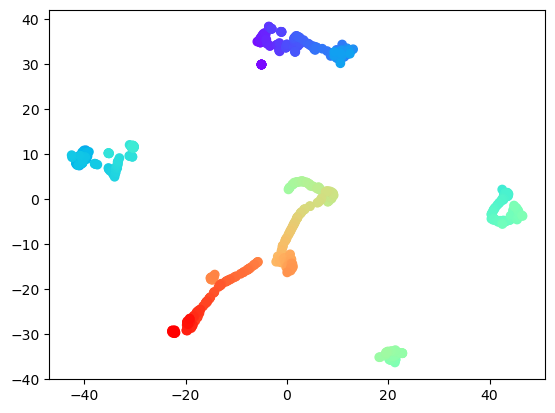

In [231]:
from sklearn.manifold import TSNE
emb = TSNE(n_components=2)
traj_transformed = emb.fit_transform(traj_disc)
n_draw = len(traj_disc)
colors = cm.rainbow(np.linspace(0, 1, n_draw))
plt.scatter(traj_transformed[:n_draw, 0], traj_transformed[:n_draw, 1], color=colors)